In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# 퀴즈를 위해 셀을 실행해 주세요.
# mpg = sns.load_dataset("mpg")
mpg = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


## (1) 결측치가 있으면 머신러닝 모델을 사용할 수 없습니다. 결측치를 모두 0으로 채워주세요. 또, 결측치를 채운 결과를 mpg 변수에 다시 담아주세요.
* mpg의 결측치의 수를 더했을 때 다음의 결과가 나오도록 합니다.
```
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
```

In [6]:
mpg = mpg.fillna(0)
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## (2) 위 셀에서 만든 split_count 변수에 담긴 숫자를 기준으로 train, test세트를 나눠주세요.
다음의 결과가 출력되도록 합니다. `((318, 9), (80, 9))`

In [8]:
# 8:2 의 비율로 학습, 예측 세트를 나누기 위해 아래 셀을 실행해 주세요.
# 다음의 빈칸을 완성해 주세요.
split_count = int(mpg.shape[0] * 0.8)

train = mpg[:split_count]
test = mpg[split_count:]
train.shape, test.shape

((318, 9), (80, 9))

* 다음 문제를 풀기위해 다음의 셀을 실행해 주세요.

In [20]:
feature_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']
label_name = 'origin'

## (3) 학습과 예측에 사용할 데이터셋을 만들어 주세요. X_train, X_test 라는 변수에 담기도록 합니다.
* 다음의 결과가 출력됩니다. `((318, 7), (80, 7))`

In [29]:
X_train = train[feature_names]
X_test = test[feature_names]

X_train.shape, X_test.shape

((318, 7), (80, 7))

## (4) 학습과 예측에 사용할 정답값을 만들어 주세요. y_train, y_test 라는 변수에 담기게 만듭니다.
* 다음의 결과가 출력됩니다. `((318,), (80,))`

In [31]:
y_train = train[label_name]
y_test = test[label_name]

y_train.shape, y_test.shape

((318,), (80,))

## (5) DecisionTreeClassifier 를 불러와서 model 이라는 변수에 담아주세요.

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)
model

DecisionTreeClassifier(random_state=1)

## (6) model 이라는 변수에 디시전트리 모델이 담겨져 있습니다. 학습세트와 정답세트를 넣고 학습을 시켜주세요.

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## (7) 모델을 예측합니다. 아래에서 결과에 대한 정확도를 측정하기 위해 y_predict 변수에 담아줍니다.

In [34]:
# 다음의 빈칸을 완성해 주세요.
y_predict = model.predict(X_test)

## (8) 빈칸을 채워 정확도를 직접 계산해 주세요. 
* 실제값과 예측값을 비교하여 True, False의 결과 값이 나오게 합니다.
* test 데이터셋의 갯수로 나누어 주고 백분위 값을 계산합니다.

In [35]:
# 정확도를 측정합니다.
score = (y_test == y_predict).sum() / len(y_predict) * 100
score

62.5

## (9) 사이킷런을 사용해서 accuracy(정확도)를 구합니다. 실제값과 예측값이 다른 비율을 100분위로 구해주세요.

In [36]:
# 사이킷런을 통해 구해주세요.
# 다음의 빈칸을 완성해 주세요.
from sklearn.metrics import accuracy_score

accuracy_score(y_predict, y_test) * 100

62.5

## (10) 피처 중요도를 시각화 해서 아래 이미지처럼 막대그래프로 표현해 주세요.

<img src="https://i.imgur.com/zjHd7G1.png" width="400">

<AxesSubplot:>

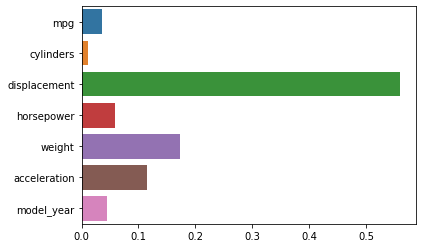

In [37]:
# 피처 중요도를 시각화 합니다.
sns.barplot(x=model.feature_importances_, y=feature_names)